# Peak size comparisons

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from grab_data import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from grab_simulations import AvailableSims, available_r0s

mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['font.size'] = 6


In [3]:
DATASET = 'CENSUS_LAD11'
r0s_available = len(available_r0s)
total_pop = get_population_sizes(DATASET).sum()

## Calculate max size

In [12]:
def total_max_size_distribution(simulation):
    max_infections = np.max(simulation.sum(axis=-1), axis=-1)
    return max_infections / total_pop

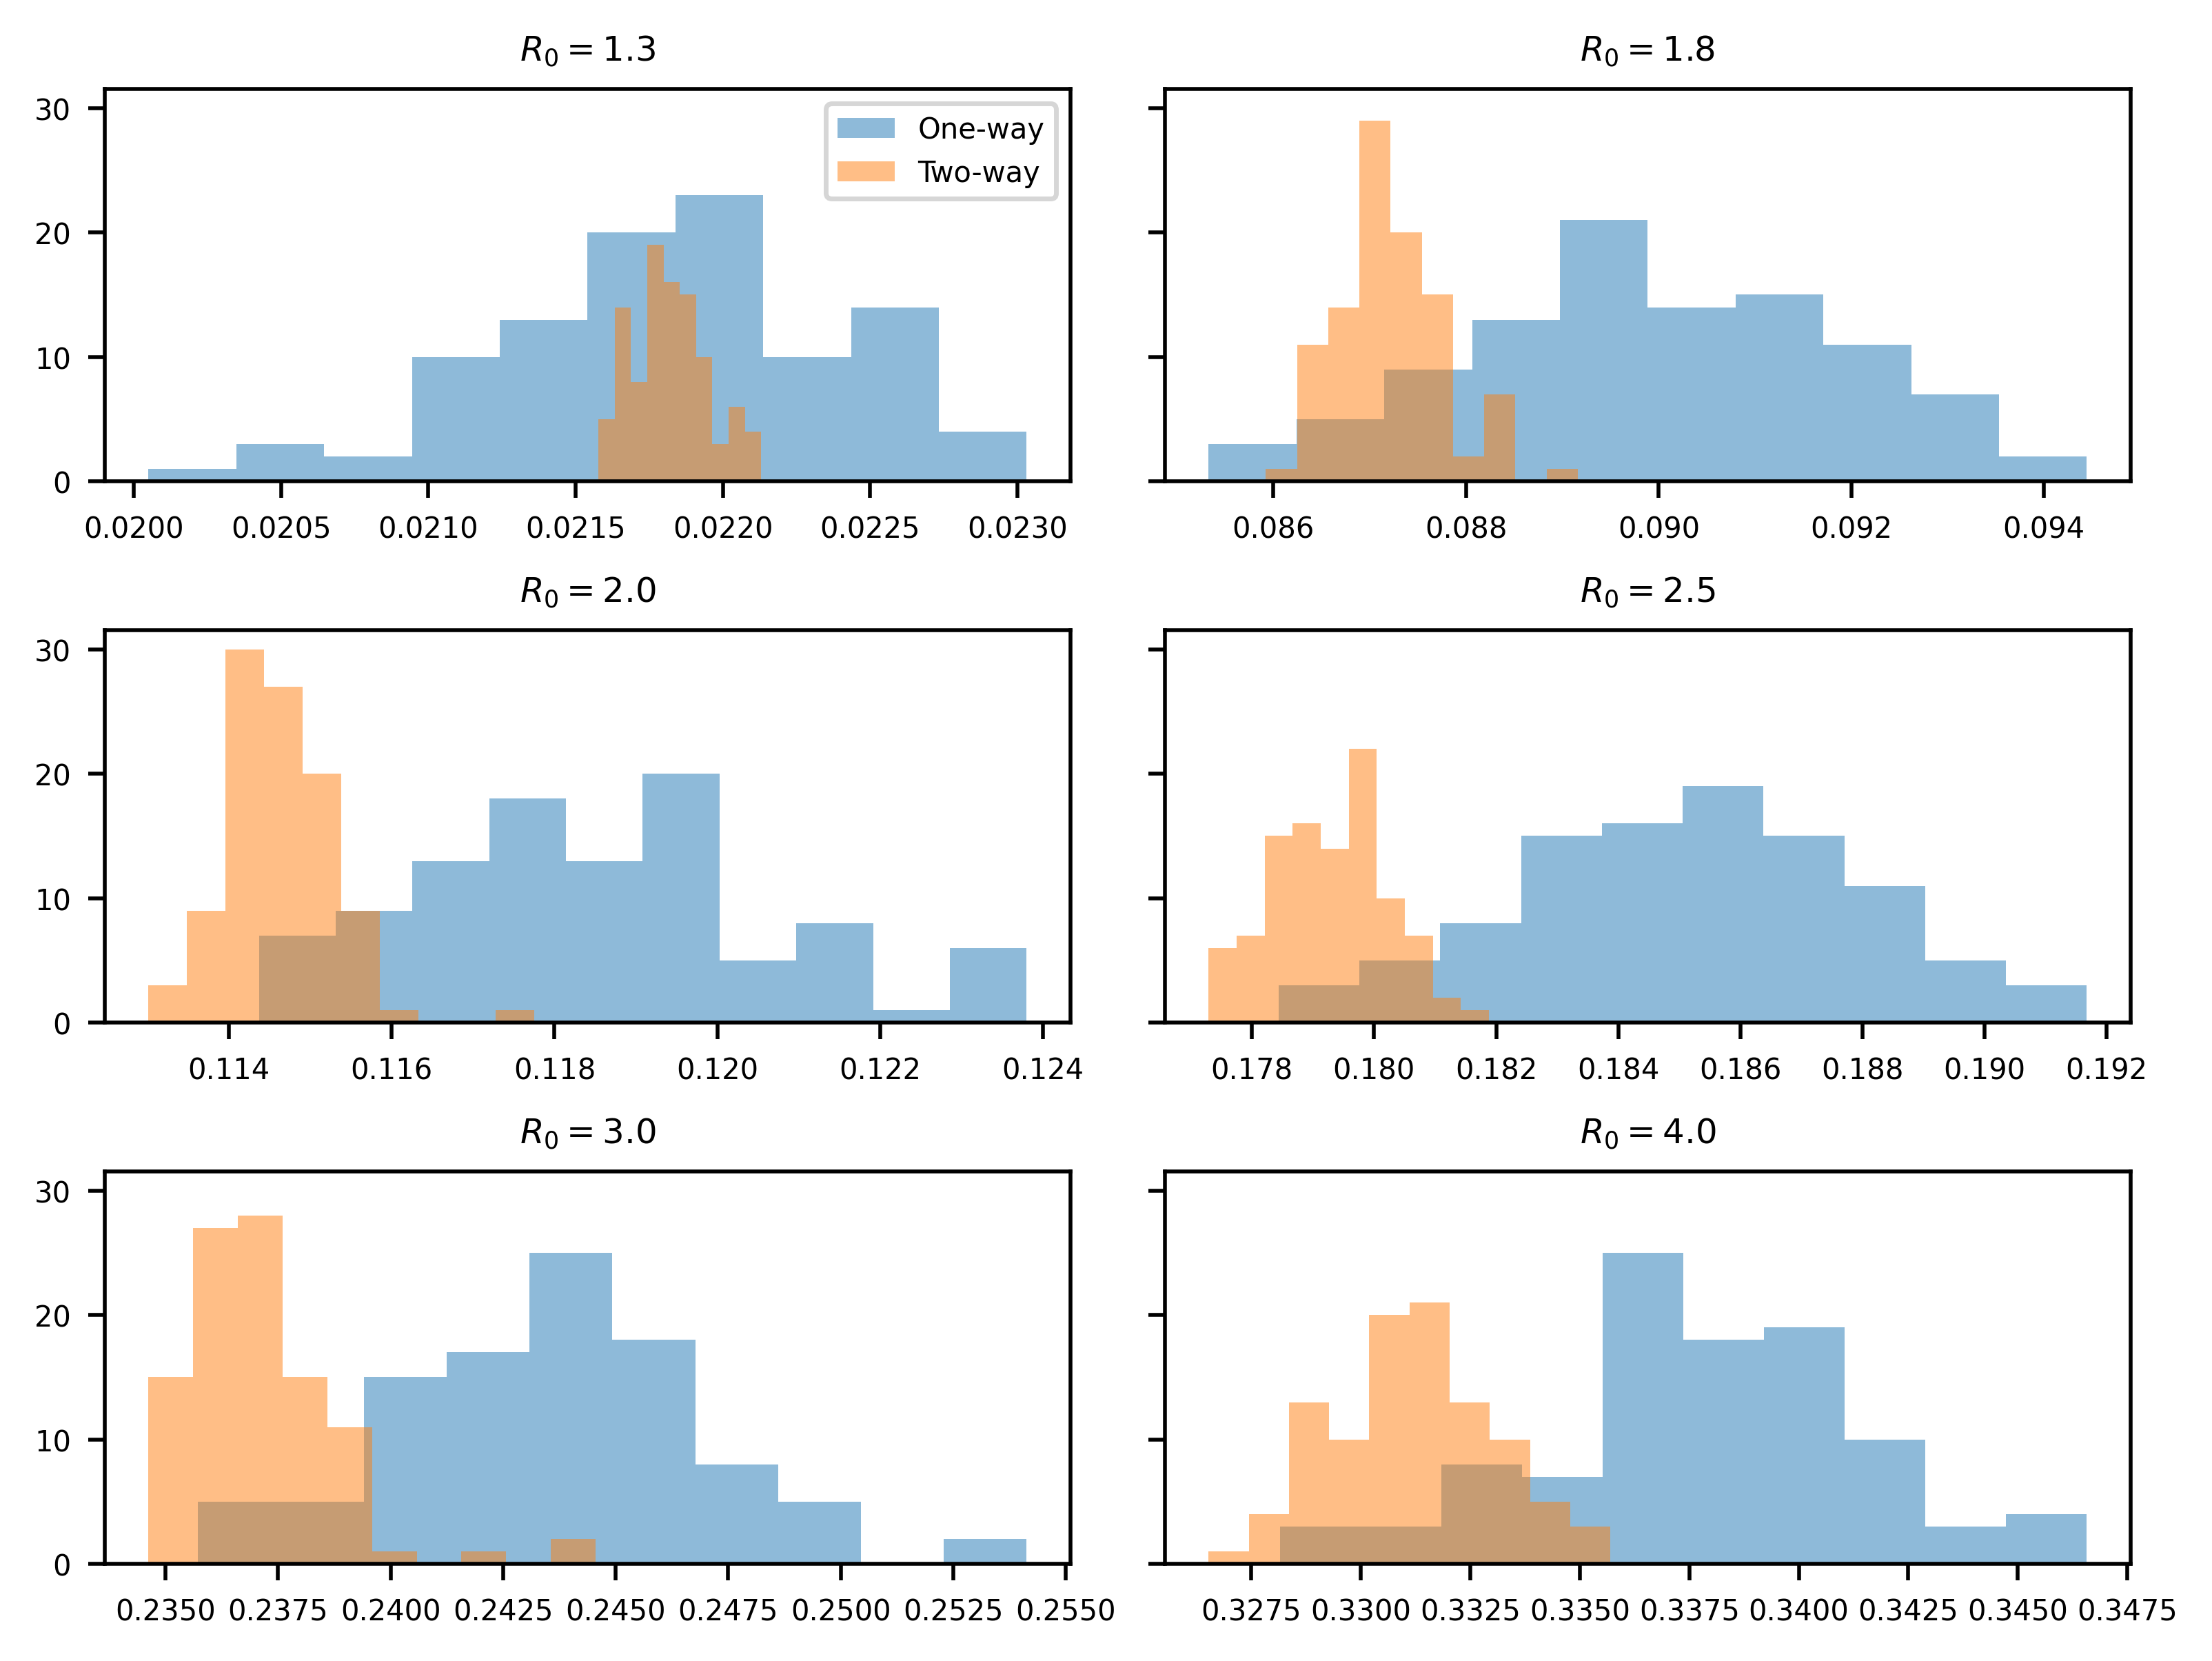

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharey=True)
for sim in AvailableSims():
    one_way, two_way, r0, point = sim
    one_way_max_sizes = total_max_size_distribution(one_way[1])
    two_way_max_sizes = total_max_size_distribution(two_way[1])
    ax[point].hist(one_way_max_sizes, label='One-way', alpha=0.5)
    ax[point].hist(two_way_max_sizes, label='Two-way',alpha=0.5)
    ax[point].set_title(f'$R_0 = {r0}$')
ax[0,0].legend()
fig.tight_layout()
plt.show()